# **CS372 Assignment 1: KNN & NB**

### **Group # : Name**

# **Summary**
Fill out the summary of this assignment here after you complete the assignment

## **Question 1**

- Download the Iris Flower data from course Moodle and use it for Question 1.
- **[2 points]** In this Question split your data 80/20. Train the model on the 80% fraction and then evaluate the accuracy on the 20% fraction. (use ['train_test_split'](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split 'train_test_split')).
    - Make sure that we preserve the proportion of each class in the splits.

#### Import Libraries

In [392]:
# import libraries in this cell
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn import svm
import time

#### Read Iris Flower Dataset

In [393]:
# read iris Flower data
ds = pd.read_csv("Iris_Assignment 1.csv", header=0, index_col=0)

### **[16 points]** Exploratory Data Analysis
1. **[5 points]** Check for missing data and data duplication. Upon detection,
    - **[2.5 points]** show records with missing tuples and explain clearly how you dealt with them. Justify your choice.
    - **[2.5 points]** Show duplicated records and explain clearly how you dealt with them. Justify your choice.
2. **[5 points]** Draw Box Plot to spot outliers.
    - **[2 points]** Explain how [Box Plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) consider outliers in the dataset.
    - **[3 points]** Analyze and comment on the plot.
3. **[2 points]** Plot [Scatter Matrix](https://seaborn.pydata.org/examples/scatterplot_matrix.html) for all features. Analyze and comment on the plot.
4. **[4 points]** Plot [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) correlation for all features.
    - **[2 points]** Clearly indicate positively and negatively correlated features.
    - **[2 points]** Analyze and comment on the plot.

#### **1.** Check Missing Data

In [394]:
# check missing data and show the records
for i in range(len(ds)):
    for j in ds.columns:
        if pd.isnull(ds.loc[ds.index[i],j]):
            print(f"ID: '{ds.index[i]}' Column: '{j}' is blank")

ID: '2' Column: 'PetalLengthCm' is blank
ID: '20' Column: 'SepalLengthCm' is blank


#### Handle Missing Data

In [395]:
print(ds.loc[[2,20]])
# handle the missing data
for column in ds.columns:
    if pd.api.types.is_numeric_dtype(ds[column]):
        ds[column] = ds.groupby('Species')[column].transform(lambda x: x.fillna(x.median()))
print(ds.loc[[2,20]])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
2             4.9           3.0            NaN           0.2  Iris-setosa
20            NaN           3.8            1.5           0.3  Iris-setosa
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
2             4.9           3.0            1.5           0.2  Iris-setosa
20            5.0           3.8            1.5           0.3  Iris-setosa


#### **Explain how you dealt with missing data**

The missing data was replaced with the mode value of the respective feature. 

There were two options considered, one being to completely ignore the tuples and remove missing data while the other option was to replace the missing data. 

Removing missing data would mean 2 tuples would be removed from the data set out of the 150 tuples (including missing and duplicate data) which is about 1.3% of the original dataset. It can be considered a relatively small percentage of data removed. 

On the other hand, replacing data poses several options. The data could be replaced with mean, median or mode. At this point of the algorithm, replacing the missing data with a mean value of the respective features may skew the data and cause inaccuracy due to the mean being affected by outliers that have yet to be removed from the dataset. Replacing the values with median and mode values of the respective features and species would yield more accurate results. 

removing missing data:
- N-fold (accuracy 98%, k=7)
- Euclidean (accuracy 97%, k=7, 1 misplaced data)
- Manhattan (accuracy 90%, k=7, 3 misplaced data)


replacing missing data with mode
- N-fold (accuracy 96%, k=3)
- Euclidean (accuracy 97%, k=3, 1 misplaced data)
- Manhattan (accuracy 97%, k=3, 1 misplaced data)

replacing missing data with median
- N-fold (accuracy 96%, k=3)
- Euclidean (accuracy 97%, k=3, 1 misplaced data)
- Manhattan (accuracy 97%, k=3, 1 misplaced data)

While removing missing data yields a higher accuracy for N-fold, Manhattan only has an accuracy of 90% with 3 misplaced data. Replacing the missing data with mode or median data yields the same N-fold accuracy of 96%, Euclidean and Manhattan accuracy of 97% with only 1 misplaced data for each. 

Overall, replacing the missing data with median or mode gives more consistent results as compared to removing missing data.

#### Check Duplicate Data

In [396]:
duplicates = ds[ds.duplicated(keep=False)]

#### Handle Duplicate Data

In [397]:
ds.drop_duplicates(inplace=True)

#### **Explain how you dealt with duplicates**

Among the 150 tuples there were 2 sets of duplicate data which consisted of 5 tuples, and were removed from the dataset. 

Duplicate data can skew results

#### **2.** Draw Box Plot

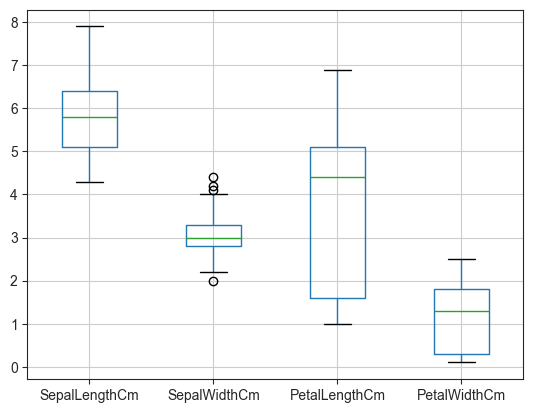

Inter-Quartile Range:
SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64


Median Range:
SepalLengthCm    5.8
SepalWidthCm     3.0
PetalLengthCm    4.4
PetalWidthCm     1.3
dtype: float64


In [398]:
ds.boxplot()
plt.show()
mean = ds.drop(['Species'], axis=1)
median = mean.median()
Q1 = mean.quantile(0.25)
Q3 = mean.quantile(0.75)
print("Inter-Quartile Range:")
print(Q3 - Q1)
print("\n")
print("Median Range:")
print(median)

#### **Explain how Box Plot consider outliers in the dataset**

The data set, as represented by the box plot, is divided into four parts Q1, Q2, Q3 and Q4. Q2 is the median and divides the data into two parts. Q1 is the lower quartile which is the median of the data set in the lower half while Q3 is the upper quartile and is the median of the data set in the upper half. The interquartile range (IQR)  is calculated by subtracting Q1 from Q3 (Q3 - Q1). 

To calculate if a value will be an outlier we can take value x to represent a a data point in a data set. Q1, Q2, Q3 and IQR are calculated based on the data set given. The formula below is used to consider outliers in a dataset. 

Q1 - (1.5 x IQR) > x > Q3 + (1.5 x IQR)

x will be considered an outlier if it is less than Q1 - (1.5 x IQR) or greater than Q3 + (1.5 x IQR).

#### **Analyze and comment on the box plot**

...There are 4 measurements represented by four box plots, Sepal Length (SL), Sepal Width (SW), Petal Length (PL) and Petal Width (PW). 

SL (5.8) has the greatest median, followed by PL (4.4), SW (3) and PW (1.3).

PL (3.5) has the largest IQR, followed by PW (1.5), SL (1.3) and SW (0.5). The larger the IQR, the wider the distribution and hence more scattered data. 

PL has 4 outliers (2, 4.1, 4.2, 4.4) while the other measurements do not have any outliers. 

SL is relatively symmetric. SW is slightly positively skewed and considering the 4 outliers, it is relatively positively skewed and asymmetric. PL and PW are positively skewed and asymmetric.

Among the four features, PL has the highest variability as indicated by its long IQR and whiskers while SW has the least variability.

#### **3.** Plot Scatter Matrix

<Figure size 640x480 with 0 Axes>

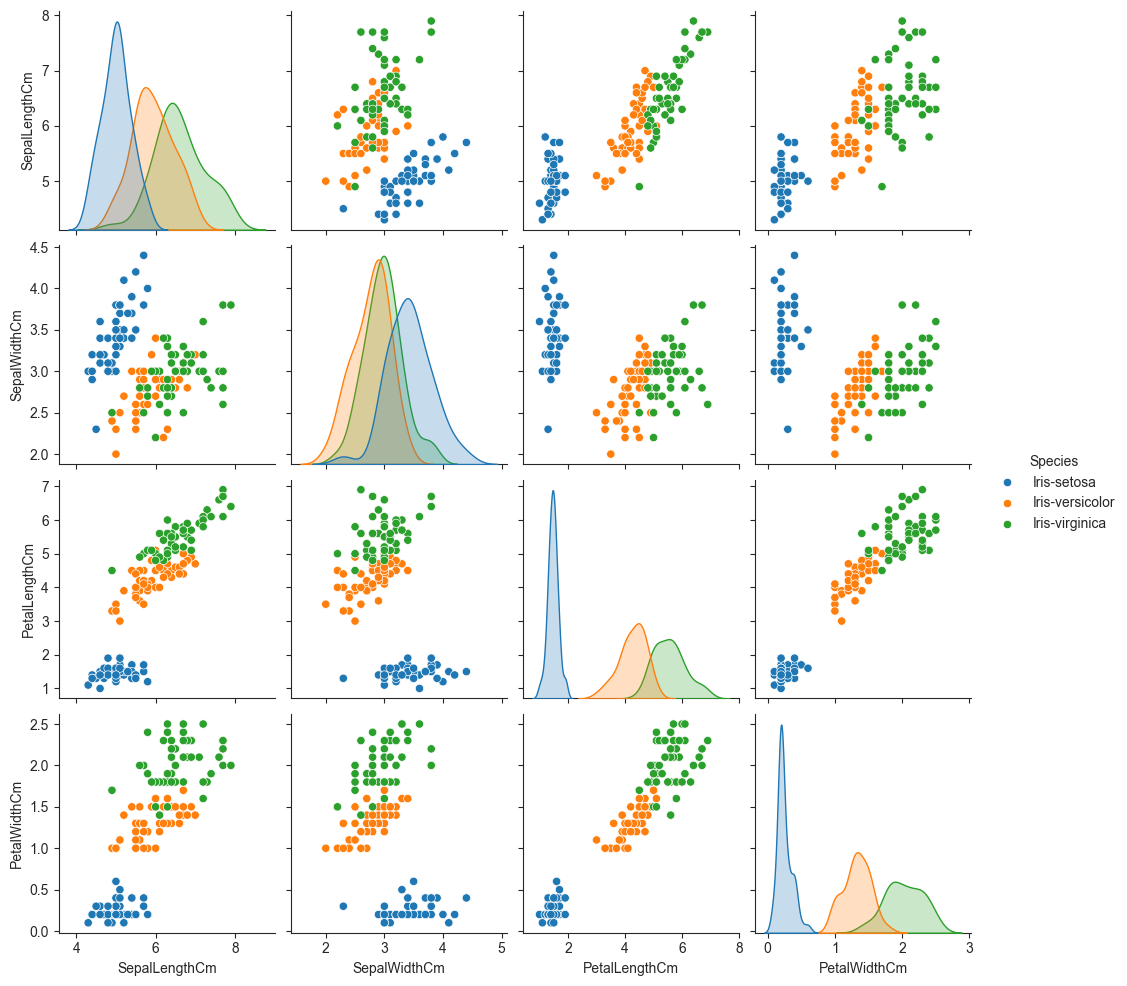

In [399]:
plt.figure()
sns.set_style("ticks")
sns.pairplot(ds, hue="Species")
plt.savefig('scatter.jpg', format='jpg')
plt.show()

#### **Analyze and comment on the scatter matrix plot**

The scatter matrix plot shows the relation between the four features Sepal Length (SL), Sepal Width (SW), Petal Length (PL) and Petal Width (PW) of three species flowers Iris-setosa (IS), Iris-vesicolor and (IVE) Iris-virginica (IVI).

There is a strong linear positive linear relationship between PW and PL and a weak positive linear relationship between PW and SL, and PL and SL. 

The three species are clustered according to their species with IVI having consistently higher y-values, followed by IVE and lastly IS, apart for the graph SW against SL values.

 


#### **4.** Plot Heatmap Correlation

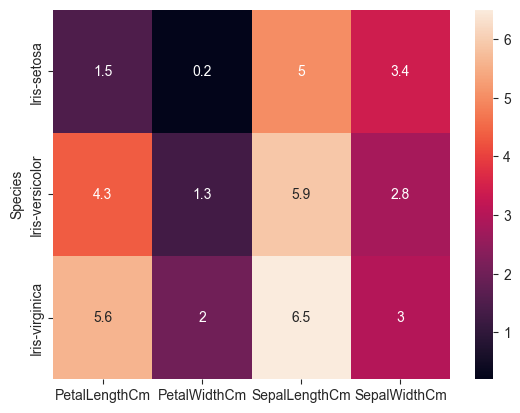

In [400]:
plt.figure()
trainMap = ds.pivot_table(index="Species", aggfunc="median")
sns.heatmap(trainMap, annot=True)
plt.show()

#### **Analyze and comment on the heatmap correlation plot**

Comparing the usage of Euclidean metric and Manhattan distance, the accuracy, k value and number of misplaced data are as follows

replacing missing data with mode
- N-fold (accuracy 96%, k=3)
- Euclidean (accuracy 97%, k=3, 1 misplaced data)
- Manhattan (accuracy 97%, k=3, 1 misplaced data)

### KNN **[15 points]**

1. **[6 points]** Implement KNN using sklearn library (use [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).
    - **[4 points]** Experiment with different distance metrics, namely, Euclidean metric and Manhattan distance. Comment on your findings.
    - **[2 points]** Use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to put all attributes on the same scale.
2. **[5 points]** Choose the best number of neighbors using [5-fold cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) (from built-in) approach we studied in the class.
3. **[2 points]** K value vs. [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): draw a 2D plot to show the average accuracy of KNN classifier vs different number of k’s. Analyze your result and comment on your plot.
    - Evaluate your model on the test data using Accuracy based on best K found in (2) & (3). Comment on the result and print misclassified flowers in table format where you show the true label in one column and the predicted table in another column.

#### **1.** StandardScaler: put all attributes on the same scale

In [401]:
nds = ds.copy()
std_scale = StandardScaler()
normalise_c = nds.columns.difference(['Species'])
nds[normalise_c] = std_scale.fit_transform(nds[normalise_c])

x = nds.drop(['Species'], axis=1)
y = nds['Species']

#### Split your data 80/20

In [402]:
# shuffle and split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=0)

#### Implement KNN using Euclidean metric and Manhattan distance

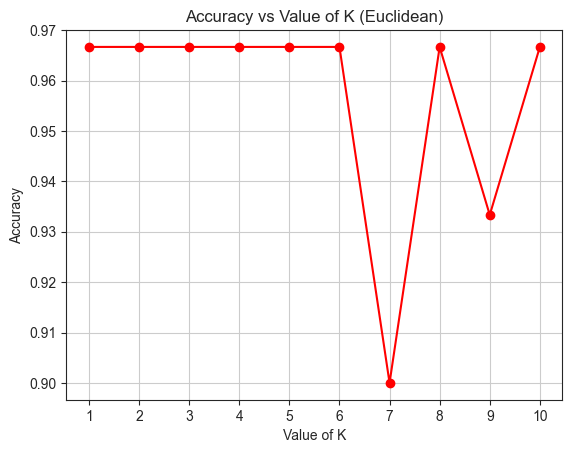

highest Accuracy (Euclidean): 0.97, K: 1, Time Taken: 2.45ms


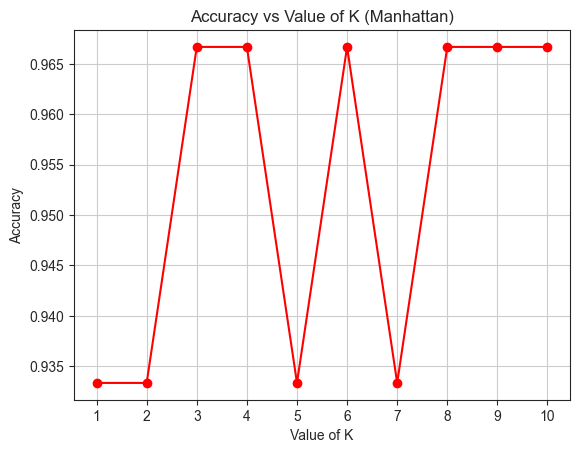

highest Accuracy (Manhattan): 0.97, K: 3, Time Taken: 1.04ms


In [403]:
# Euclidean KNN, is this the triangle guy?
high_acc = 0.0
nh = 0
accuracies1 = []
best_time1 = 0
for n in range(1,11):
    knn1 = KNeighborsClassifier(n_neighbors=n, weights='uniform', algorithm='auto', metric='euclidean')
    knn1.fit(x_train, y_train)
    start_time1 = time.time()
    x_pre = knn1.predict(x_test)
    end_time1 = time.time()

    accuracy = accuracy_score(y_test, x_pre)
    accuracies1.append(accuracy)
    # print(f"Accuracy: {accuracy:.2f}, n_neighbour: {n}")
    if accuracy > high_acc:
        best_time1 = end_time1 - start_time1
        high_acc = accuracy
        nh = n

plt.figure()
plt.plot(range(1,11), accuracies1, marker='o',  linestyle='-', color='r')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Value of K (Euclidean)')
plt.xticks(range(1,11))
plt.grid(True)
plt.savefig('AvK(Euclidean).jpg', format='jpg')
plt.show()

print(f"highest Accuracy (Euclidean): {high_acc:.2f}, K: {nh}, Time Taken: {best_time1*1000:.2f}ms\n")

# Manhattan's KNN, I wanna visit manhattan some day!
high_acc = 0.0
nh = 0
accuracies2 = []
best_time2 = 0.000
for n in range(1,11):
    knn2 = KNeighborsClassifier(n_neighbors=n, weights='uniform', algorithm='auto', metric='manhattan')
    knn2.fit(x_train, y_train)
    start_time2 = time.time()
    x_pre = knn2.predict(x_test)
    end_time2 = time.time()

    accuracy = accuracy_score(y_test, x_pre)
    accuracies2.append(accuracy)
    # print(f"Accuracy: {accuracy:.2f}, n_neighbour: {n}")
    if accuracy > high_acc:
        best_time2 = end_time2 - start_time2
        high_acc = accuracy
        nh = n

plt.figure()
plt.plot(range(1,11), accuracies2, marker='o',  linestyle='-', color='r')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Value of K (Manhattan)')
plt.xticks(range(1,11))
plt.grid(True)
plt.savefig('AvK(Manhattan).jpg', format='jpg')
plt.show()

print(f"highest Accuracy (Manhattan): {high_acc:.2f}, K: {nh}, Time Taken: {best_time2*1000:.2f}ms\n")

#### **Analyze and comment on your finding**

Analyze KNN with different metrics regarding accuracy, time, 

Euclidean takes longer to process the data as a result of the square rooting the distances, Manhattan uses the direct values in the x and y region to compare and predict the results. As a result Euclidean took 2.03ms with K=1 to make a prediction while Manhattan took 1.03ms with K=3 to make a prediction. Both methods have a peak accuracy of 97%.

#### **2.** Choose the Best Number of Neighbors (5-Fold Cross Validation)

In [404]:
clf = (svm.SVC(kernel='linear', C=1))
clf.fit(x_train, y_train)
best_mean = 0.0
bn = 0
mean_acc = []
n_range = range(2,11)
print("--------------------------------------------------------")
for n in n_range:
    scores = cross_val_score(clf, x_train, y_train, cv=n, scoring='accuracy')
    mean_score = scores.mean()
    mean_acc.append(mean_score)

    # print(f"Accuracy of {n}-Fold: {mean_score:.2f}")
    if mean_score > best_mean:
        best_mean = mean_score
        bn = n
print(f"\nN-Fold ------ Best N: {bn}, Best Accuracy: {best_mean:.2f}\n")
print("--------------------------------------------------------")

--------------------------------------------------------

N-Fold ------ Best N: 3, Best Accuracy: 0.96

--------------------------------------------------------


#### **3.** Draw Plot : K value vs Accuracy

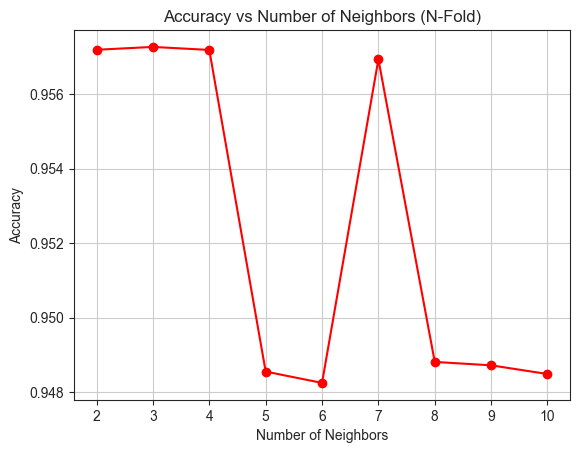

In [405]:
# It's time to plot the K-Value against the accuracy! WooHoo
plt.figure()
plt.plot(n_range, mean_acc, marker='o',  linestyle='-', color='r')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors (N-Fold)')
plt.xticks(n_range)
plt.grid(True)
plt.savefig('AvN(N-Fold).jpg', format='jpg')
plt.show()

#### Evaluate your model on the test data using Accuracy based on K found in (2) & (3)

In [406]:
# Re-Evaluating knn with new n!
knn1 = KNeighborsClassifier(n_neighbors=bn, weights='uniform', algorithm='auto', metric='euclidean')
knn1.fit(x_train, y_train)
start_time1 = time.time()
y_pre1 = knn1.predict(x_test)
end_time1 = time.time()
accuracy1 = knn1.score(x_test, y_test)
print(f"Accuracy: {accuracy1:.2f}, n_neighbour: {bn}, time taken: {(end_time1 - start_time1)*1000:.2f}ms\n")

# This is the re-evaluation of the manhattan version of knn!
knn2 = KNeighborsClassifier(n_neighbors=bn, weights='uniform', algorithm='auto', metric='manhattan')
knn2.fit(x_train, y_train)
start_time2 = time.time()
y_pre2 = knn2.predict(x_test)
end_time2 = time.time()
accuracy2 = knn2.score(x_test, y_test)
print(f"Accuracy: {accuracy2:.2f}, n_neighbour: {bn}, time taken: {(end_time2 - start_time2)*1000:.2f}ms\n")

Accuracy: 0.97, n_neighbour: 3, time taken: 2.52ms

Accuracy: 0.97, n_neighbour: 3, time taken: 1.60ms


#### Print misclassified flowers

In [407]:
print(classification_report(y_test, y_pre1))
misclassified_indices1 = y_test.index[y_test != y_pre1]
misclassified_flowers1 = ds.loc[misclassified_indices1].copy()
misclassified_flowers1['True Label'] = y_test.loc[misclassified_indices1]
misclassified_flowers1['Predicted Label'] = y_pre1[y_test.index.isin(misclassified_indices1)]
print("-----------Misclassified Flowers (Euclidean)------------")
print(misclassified_flowers1)
print("--------------------------------------------------------")

print(classification_report(y_test, y_pre2))
misclassified_indices2 = y_test.index[y_test != y_pre2]
misclassified_flowers2 = ds.loc[misclassified_indices2].copy()
misclassified_flowers2['True Label'] = y_test.loc[misclassified_indices2]
misclassified_flowers2['Predicted Label'] = y_pre2[y_test.index.isin(misclassified_indices2)]
print("-----------Misclassified Flowers (Manhattan)------------")
print(misclassified_flowers2)
print("--------------------------------------------------------")

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

-----------Misclassified Flowers (Euclidean)------------
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species  \
Id                                                                              
134            6.3           2.8            5.1           1.5  Iris-virginica   

         True Label  Predicted Label  
Id                                    
134  Iris-virginica  Iris-versicolor  
--------------------------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-ver

#### **Analyze and comment on the result**

Evaluate your model on the test data using Accuracy based on best K found in (2) & (3). Comment on the result and print misclassified flowers in table format where you show the true label in one column and the predicted table in another column.

The N-fold calculated a K value of 3 with the highest accuracy of 96% during its own testing. Using this K value with the Euclidean and Manhattan resulted in the peak accuracy of 97% both classifying the same data wrongly. Having evaluated the data-set using both non n-fold and n-fold methods, and classifying the same data wrongly might suggest that the Id 134 might be invalid or an outlier in the dataset causing the prediction to be wrong.

### Naive Bayes **[9 points]**
1. **[5 points]** You need to implement Naïve Bayes using the [built-in library](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) and use it to predict the Species of iris in the test dataset.
2. **[4 points]** Use [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to assess the performance of your classifier.
    - **[2 points]** Print misclassified flowers in table format where you show the true label in one column and the predicted table in another column.

#### **1.** Implement Naive Bayes

In [408]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

#### **2.** Assess the Performance (Accuracy)

In [409]:
y_pred = gnb.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print(f"\nAccuracy (in %): {accuracy:.2f}")



Accuracy (in %): 96.67


#### Print misclassified flowers

In [410]:
misclassified = (y_test != y_pred).sum()
print("Number of misclassified flowers:", misclassified)
print(classification_report(y_test, y_pred))

misclassified_indices = y_test.index[y_test != y_pred]
misclassified_flowers = ds.loc[misclassified_indices].copy()
misclassified_flowers['True Label'] = y_test.loc[misclassified_indices]
misclassified_flowers['Predicted Label'] = y_pred[y_test.index.isin(misclassified_indices)]
print(misclassified_flowers)

Number of misclassified flowers: 1
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species  \
Id                                                                              
134            6.3           2.8            5.1           1.5  Iris-virginica   

         True Label  Predicted Label  
Id                                    
134  Iris-virginica  Iris-versicolor  


## **Question 2**

**Problem description**: Predict the onset of diabetes based on diagnostic measures.
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
Some information about the data :
- Number of pregnancies.
- Body Mass Index (BMI)
- Insulin level.
- Age.
- Glucose.
- Blood Pressure.
- Diabetes Pedigree Function.
- Outcome (Target Feature).
  
1. Download the Pima Indians Diabetes Database data from course Moodle.
2. Split your data 80/20. Train the model on the 80% fraction and then evaluate the accuracy on the 20% fraction.

### **[16 points]** Exploratory Data Analysis
3. **[3 points]** Check for missing data and data duplication. Upon detection, show and explain clearly how you dealt with them. Justify your choice.
4. **[2 points]** Draw Box Plot to spot outliers. Analyze and comment on the plot.
5. **[2 points]** Plot scatter matrix for all features. Analyze and comment on the plot.
6. **[3 points]** Plot Heatmap correlation for all features. Analyze and comment on the plot.

#### **3.** Check Missing Data

In [411]:
# check missing data and show the records
diabetes = pd.read_csv("diabetes.csv", header=0) # no index number, so no need for index_col = 0
for i in range(len(ds)):
    for j in ds.columns:
        if pd.isnull(ds.loc[ds.index[i],j]):
            print(f"ID: '{ds.index[i]}' Column: '{j}' is blank")

#### Handle Missing Data

In [412]:
# handle the missing data
diabetes.dropna(inplace=True)

#### Check Duplicate Data

In [413]:
duplicates = diabetes[diabetes.duplicated(keep=False)] 

#### Handle Duplicate Data

In [414]:
diabetes.drop_duplicates(inplace=True) # throw away all duplicate data

#### **Explain how you dealt with missing data and duplicates**

Explain how you dealt them, why, and justify your choice here.

Answer:

The missing data are found by looping through columns and rows of the data to check for NULL values. When a missing value is found, the index and column name of the missing value are printed in a formatted string. ds.dropna(inplace=True) removes all missing as part of preprocessing to keep the data clean. But in the excel sheet, there are no empty cells, so there are probably no data that are discarded.

Duplicate data is found with ds.duplicated() from the pandas library, it returns a Boolean series to indicate whether each row is a duplicate or not. ds.drop_duplicate(inplace=True) removes all duplicate data as part of preprocessing to keep the data clean.

#### **4.** Draw Box Plot

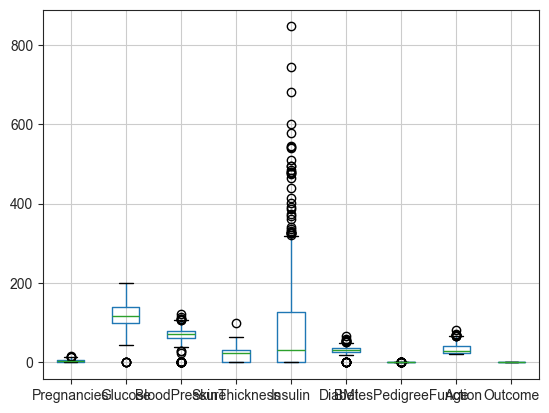

In [415]:
diabetes.boxplot()
plt.show()

#### **Analyze and comment on the box plot**

Add comments here

Answer:

The box plot shows many outliers in features such as insulin, skin thickness, and age, indicating wide ranges and extreme values in these measurements. Most other features, like BMI and blood pressure many of which include the value 0, which is not possible. The other features like BMI and blood pressure have relatively consistent distributions with lesser outliers.

To improve the model performance, data preprocessing is required to remove outliers and fill in the zeros in the data, among other steps to improve the usability of the data. Only then can the data be used for prediction.


#### **5.** Plot Scatter Matrix

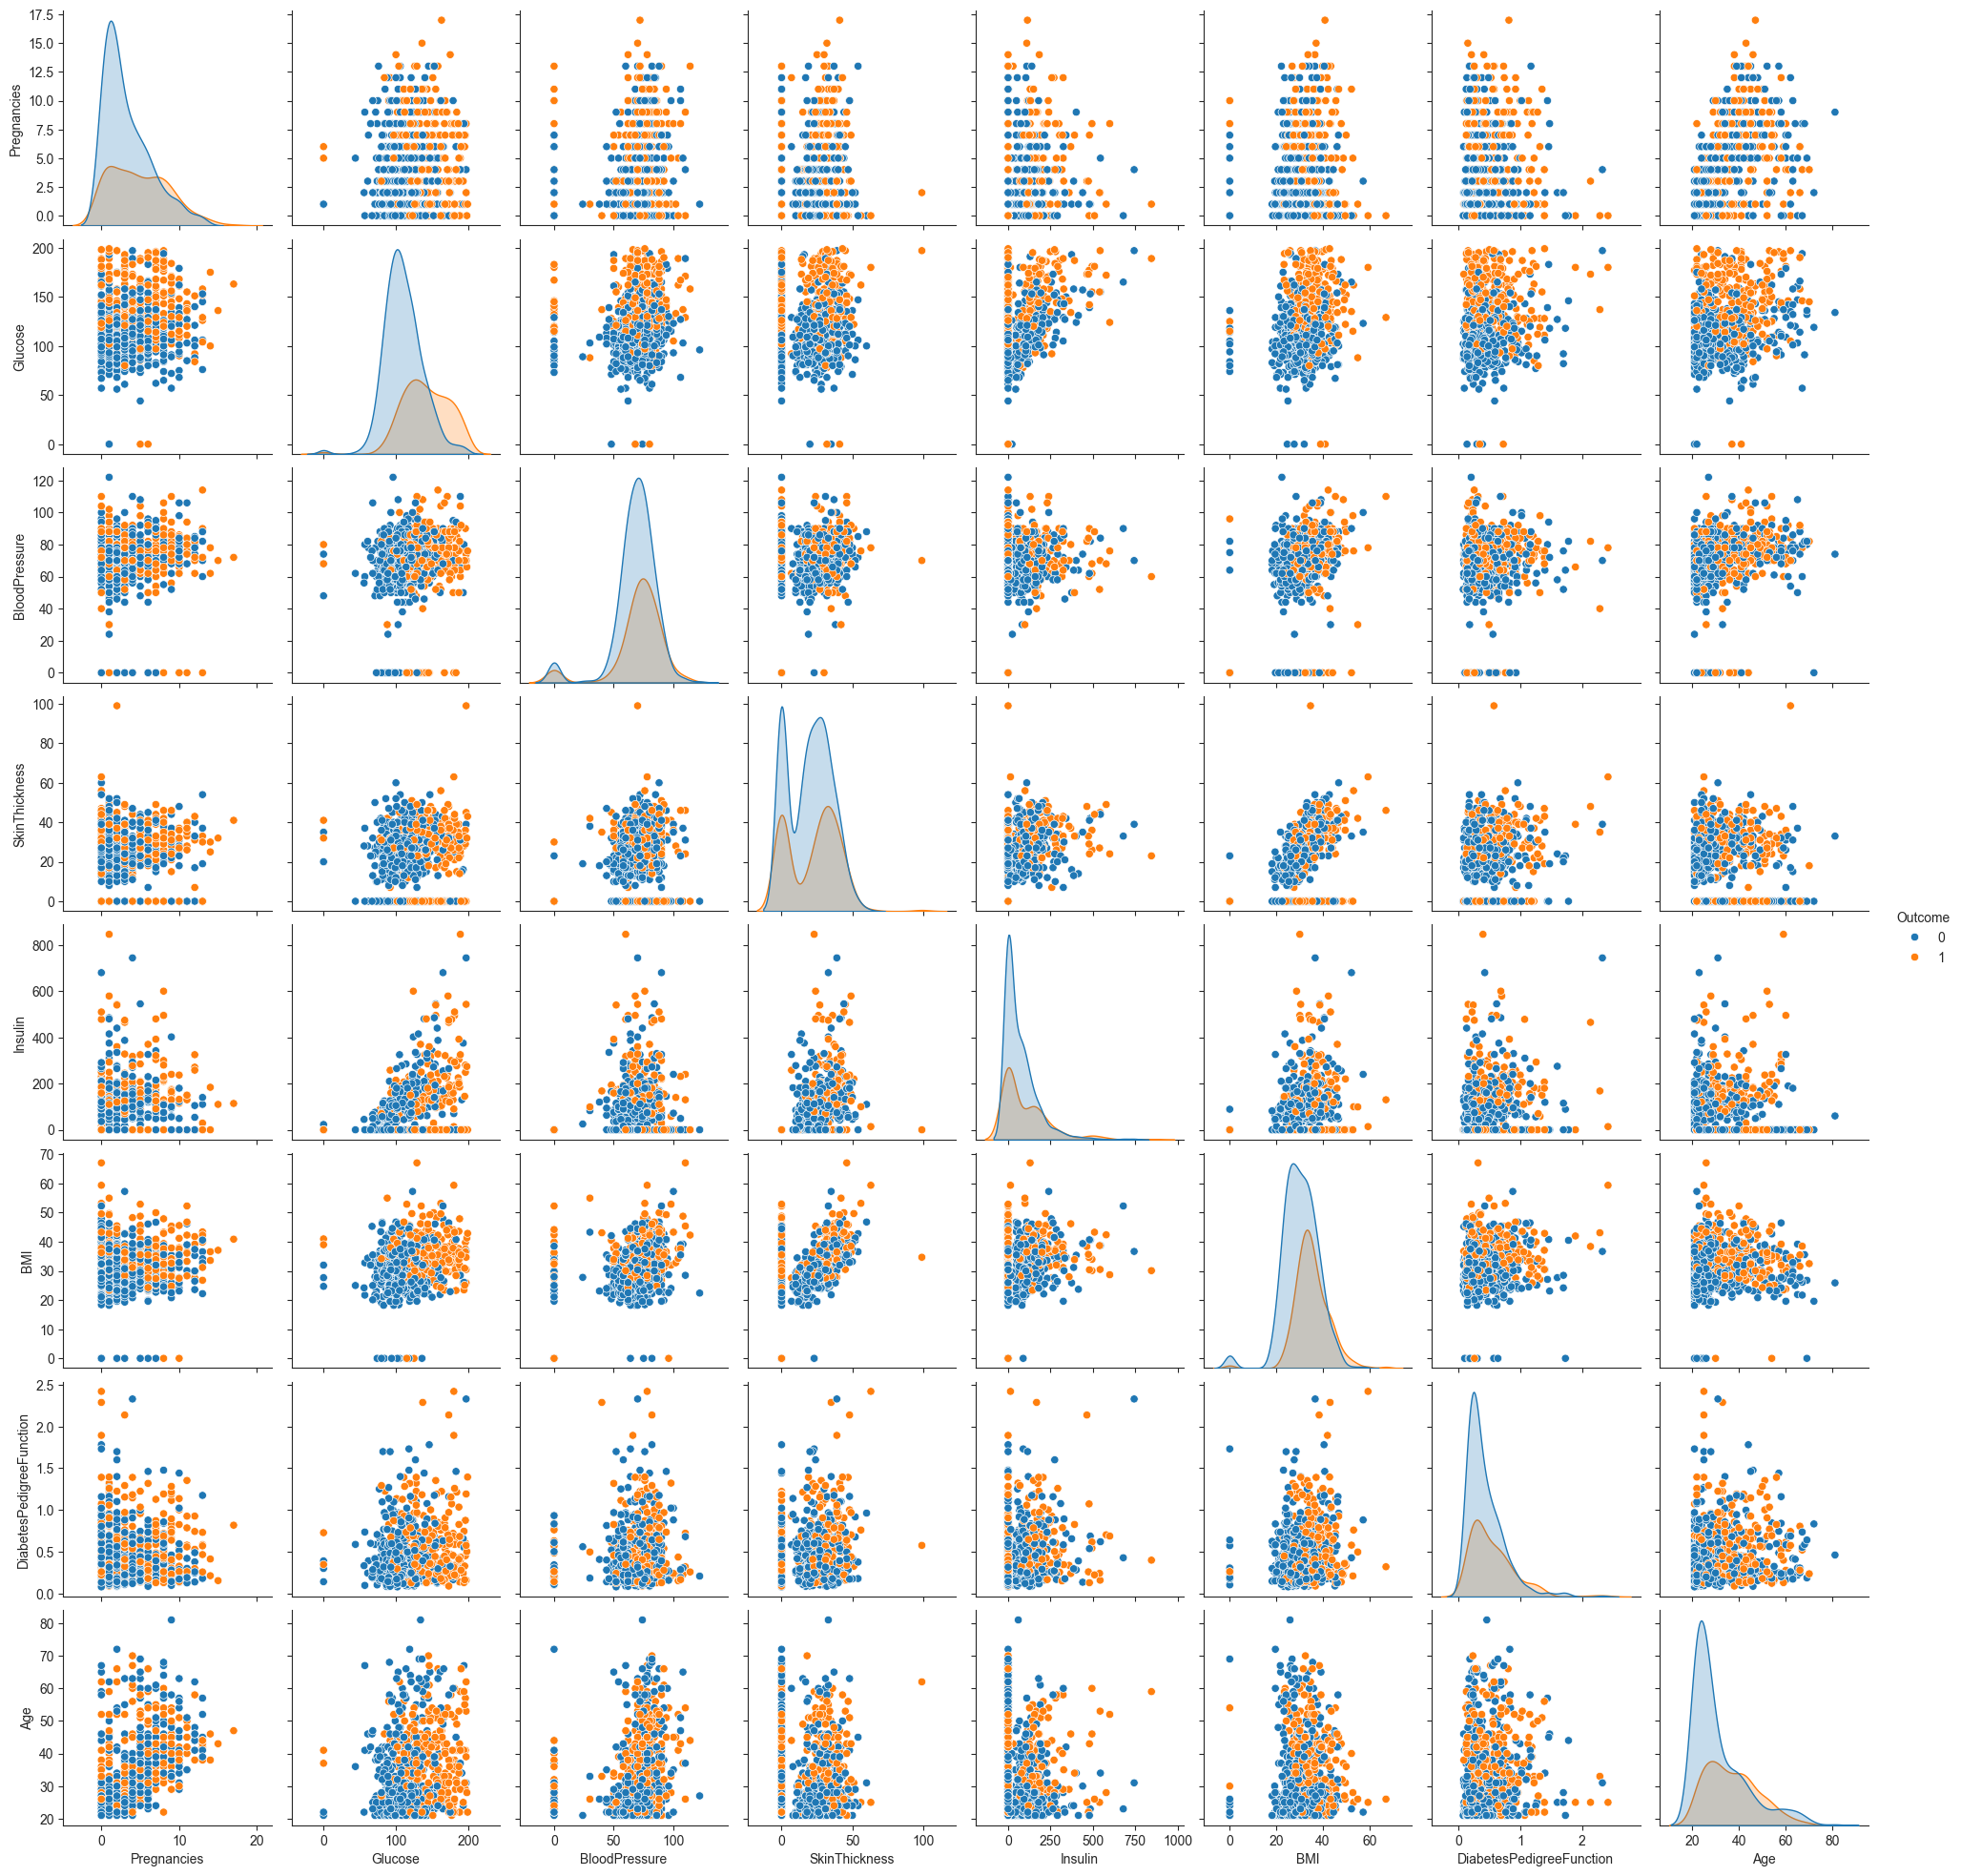

In [416]:
sns.set_style("ticks")
sns.pairplot(diabetes, hue="Outcome")
plt.show()

#### **Analyze and comment on the scatter matrix plot**

Add comments here

Answer:

The scatter plot matrix provides valuable insights into the relationship between features and their predictive abilities for the outcome of diabetes.

Glucose and BMI are directly proportional to diabetes outcome, whereby the higher values typically indicate a positive diagnosis. Insulin levels also show high variability and correlate with glucose and BMI. Age also correlates with the number of pregnancies and also slight correlates with glucose and insulin levels. Blood pressure and diabetes pedigree function(DPF) show weak correlations with the outcome of diabetes.

In conclusion, the plot suggests that glucose and BMI are strong predictors of diabetes, while blood pressure and DPF are less significant.


#### **6.** Plot Heatmap Correlation

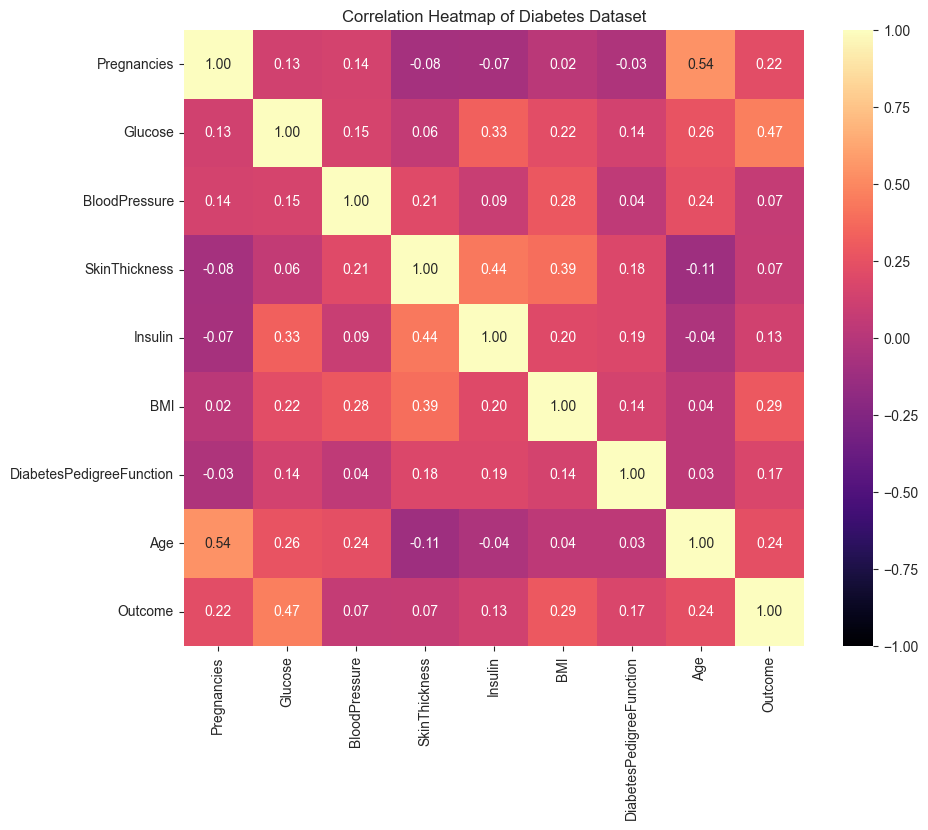

In [417]:
correlation_matrix = diabetes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

#### **Analyze and comment on the heatmap correlation plot**

Add comments here

Answer:

Heatmaps provides insight to correlations between variables and show variance between them too.

The heatmap shows that glucose and BMI are strong predictors of diabetes, with significant positive correlations with the outcome at 0.47 and 0.29 respectively. Age and the number of pregnancies also show a correlation with the outcome, this suggests that they also play a part in being able to predict diabetes. Conversely, blood pressure and DPF show weak correlation with the outcome. From the heat map, we can identify what should be more focused on, the features with high correlation like glucose and BMI.

#### Split your data 80/20

In [418]:
# shuffle and split
X = diabetes.drop(columns=["Outcome"])
y = diabetes["Outcome"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

### **Question 2 Part 1**
### **[20 points]** Implement Gaussian Naïve Bayes from scratch.
- **[10 points]** Make sure to use functions in writing your codes.
- **[5 points]** Underflow prevention.
- **[5 points]** Zero variance.

#### Implement Function for Gaussian Naive Bayes

In [419]:
class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = None
        self.var = None
        self.priors = None

    def fit(self, X, y):
        # Calculate the mean, variance, and prior for each class
        self.classes = np.unique(y)
        self.mean = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.var = np.zeros((len(self.classes), X.shape[1]), dtype=np.float64)
        self.priors = np.zeros(len(self.classes), dtype=np.float64)
        
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(X.shape[0])

    def _gaussian_probability(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        # Handle zero variance
        var[var == 0] = 1e-9
        exponent = np.exp(- (x - mean) ** 2 / (2 * var))
        return (1 / np.sqrt(2 * np.pi * var)) * exponent

    def _predict(self, x):
        posteriors = []
        
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])  # Use log to prevent underflow
            class_conditional = np.sum(np.log(self._gaussian_probability(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

#### Evaluate your own Gaussian Naive Bayes

In [420]:
def print_rows_with_zeros(diabetes, zero_threshold=3):
    # Only columns B to G because only these rows have '0' which is not physically possible
    columns_to_check = diabetes.columns[1:7]
    zero_rows = diabetes[columns_to_check].apply(lambda row: (row == 0).sum(), axis=1) >= zero_threshold
    rows_with_zeros = diabetes[zero_rows]
    rows_to_remove = diabetes[zero_rows].index
    d_cleaned = diabetes.drop(rows_to_remove)
    return d_cleaned

def calculate_mean_for_outcomes(diabetes, column_to_analyze, outcome_column):
    means = {}
    #print(f"Unfiltered")
    for column in column_to_analyze:
        # Group by the outcome column and calculate the mean of the specified column
        means[column] = diabetes.groupby(outcome_column)[column].mean()
        hehe = diabetes.groupby(outcome_column)[column].mean()
        mean_values = diabetes[column].mean()
        #keep for debugging
        #print(f"Mean of column '{column}'': {mean_values:.2f}")
        
        # Print the mean values for each outcome
        #for outcome, mean_value in hehe.items():
            #print(f"Mean of column '{column}' for outcome '{outcome}': {mean_value:.2f}")

    # Replace '0' values with the mean for the respective outcome
    for column in column_to_analyze:
        if column in means:
            for outcome in means[column].index:
                mean_value = means[column][outcome]
                mean_value = mean_value.astype(diabetes[outcome_column].dtype)
                diabetes.loc[(diabetes[column] == 0) & (diabetes[outcome_column] == outcome), column] = mean_value

    #print(f"Filtered")
    for column in column_to_analyze:
        # Group by the outcome column and calculate the mean of the specified column
        mean_value = diabetes[column].mean()
        #print(f"Mean of column '{column}: {mean_value:.2f}")
    
    return diabetes

# Normalize the data using Min-Max normalization
def min_max_normalize(diabetes):
    return (diabetes - diabetes.min()) / (diabetes.max() - diabetes.min())

diabetes = print_rows_with_zeros(diabetes)
column_I = diabetes.columns[-1]
target_column = diabetes.columns[1:7]
diabetes = calculate_mean_for_outcomes(diabetes, target_column, column_I)
print(diabetes)

# Separate features and target
X = diabetes.drop(columns=["Outcome"])  # Use the correct column name
y = diabetes["Outcome"]  # Use the correct column name

# Normalize the features
X_normalized = min_max_normalize(X)

# Ensure all columns are of numeric types
X_normalized = X_normalized.astype(float)

# Set a random seed for reproducibility
random_seed = 42

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes
gnb = GaussianNaiveBayes()
gnb.fit(X_train.to_numpy(), y_train.to_numpy())

# Predict
start_time = time.time()
y_pred_nb_custom = gnb.predict(X_test.to_numpy())
end_time = time.time()
execution_time_nb_custom = end_time - start_time

y_pred_nb_custom = gnb.predict(X_test.to_numpy())
accuracy_nb_custom = accuracy_score(y_test, y_pred_nb_custom)
conf_matrix_nb_custom = confusion_matrix(y_test, y_pred_nb_custom)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35      106  33.6   
1              1       85             66             29       71  26.6   
2              8      183             64             23      106  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27       71  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60             23      106  30.1   
767            1       93             70             31       71  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

#### Accuracy

Execution Time: 0.0026 seconds
Accuracy: 0.7211
Confusion Matrix:
[[75 19]
 [22 31]]


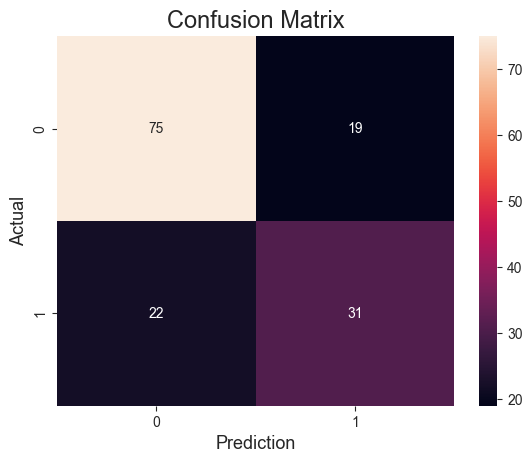

In [421]:
print(f"Execution Time: {execution_time_nb_custom:.4f} seconds")
print(f"Accuracy: {accuracy_nb_custom:.4f}")
print("Confusion Matrix:")
print(conf_matrix_nb_custom)
cm = confusion_matrix(y_test, y_pred_nb_custom)
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### **[20 points] Question 2 Part 2**
8. **[12 points]** You need to implement KNN from scratch:
- **[5 points]** Implement Euclidean Distance from scratch (please, don’t use built-in library).
- **[2 points]** Use [Min-Max](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to normalize the dataset.
9. **[9 points]** Tune the number of nearest neighbors k
- What is the optimal value of k? To figure it out:
    - **[5 points]** Implement N-fold-cross validation from scratch:
        - Train KNN classifier using 5-fold-cross validation using various values of k.
            - Explain/ justify the choice of the range of K values.
            - Choose k that obtained the highest accuracy.
    - Next, evaluate the classifier using the optimal value of K that we found using 5-fold cross validation on the test set (20% that we did not use in the 5-fold cross validation) and obtain the final results.
- **[2 points]** In case of tie, KNN algorithm prefers the neighbor with closer distance to the query.
- **[2 points]** K value vs. Accuracy: draw a 2D plot to show the accuracy of KNN classifier vs different number of k’s.

#### **8.** Function for KNN (from scratch) 
- Metric: Euclidean Distance
- Normalize: [Min-Max](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- In case of tie, KNN algorithm prefers the neighbor with closer distance to the query

In [422]:
# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

# KNN prediction function
def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for test_row in X_test:
        distances = []
        for train_row, label in zip(X_train, y_train):
            dist = euclidean_distance(test_row, train_row)
            distances.append((dist, label))
        # Sort by distance and get the k nearest neighbors
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]
        
        # Count the occurrences of each class in the k neighbors
        class_counts = {}
        for distance, label in neighbors:
            if label in class_counts:
                class_counts[label] += 1
            else:
                class_counts[label] = 1

        # Determine the class with the highest count
        sorted_class_counts = sorted(class_counts.items(), key=lambda x: (-x[1], x[0]))
        prediction = sorted_class_counts[0][0]
        predictions.append(prediction)
    return np.array(predictions)

#### **9.** Tune the Number of Nearest Neighbors K

#### Implement function for N-Fold-Cross Validation (from scratch)

In [423]:
def cross_val_score_knn(X, y, k, n_folds=5):
    # use a fixed seed so data is not random on every run
    if random_seed is not None:
        np.random.seed(random_seed)
        
    # Shuffle the data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    # Split the data into n folds
    fold_size = len(X) // n_folds
    scores = []
    total_time = 0

    for i in range(n_folds):
        # Create test fold
        start, end = i * fold_size, (i + 1) * fold_size
        X_test_fold = X[start:end]
        y_test_fold = y[start:end]

        # Create train folds
        X_train_fold = np.concatenate([X[:start], X[end:]], axis=0)
        y_train_fold = np.concatenate([y[:start], y[end:]], axis=0)

        # Measure time for prediction
        start_time = time.time()
        y_pred_fold = knn_predict(X_train_fold, y_train_fold, X_test_fold, k)
        end_time = time.time()

        # Calculate time taken for this fold
        fold_time = end_time - start_time
        total_time += fold_time

        # Calculate accuracy
        score = accuracy_score(y_test_fold, y_pred_fold)
        scores.append(score)
        average_time = total_time / n_folds
        return np.mean(scores), scores, average_time

#### Train KNN Classifier using 5-Fold-Cross Validation with Various Values of K

In [424]:
# KNN classifier using 5-fold-cross validation with various values of k
# Values of k to test
k_values = list(range(1, 21))
n_folds = 5

# Store the average accuracy and execution time for each k
average_accuracies = []
execution_times = []

#### Accuracy of KNN Classifier with Various K

In [425]:
#Calculate accuracy
# finding accuracy of KNN classifier with k from 1 to 21 (20 values)
for k in k_values:
    average_score, _, execution_time = cross_val_score_knn(X_normalized.to_numpy(), y.to_numpy(), k, n_folds)
    average_accuracies.append(average_score)
    execution_times.append(execution_time)
    print(f"Average accuracy for k={k}: {average_score:.2f}")

Average accuracy for k=1: 0.72
Average accuracy for k=2: 0.70
Average accuracy for k=3: 0.72
Average accuracy for k=4: 0.73
Average accuracy for k=5: 0.73
Average accuracy for k=6: 0.73
Average accuracy for k=7: 0.73
Average accuracy for k=8: 0.73
Average accuracy for k=9: 0.72
Average accuracy for k=10: 0.73
Average accuracy for k=11: 0.75
Average accuracy for k=12: 0.71
Average accuracy for k=13: 0.72
Average accuracy for k=14: 0.71
Average accuracy for k=15: 0.71
Average accuracy for k=16: 0.71
Average accuracy for k=17: 0.71
Average accuracy for k=18: 0.71
Average accuracy for k=19: 0.71
Average accuracy for k=20: 0.73


#### **Analyze and comment on choice of the range of K values**

Explain/justify the choice of the range of K values. Choose K that obtained the highest accuracy

#### Evaluate KNN Classifier with the Best K


Optimal number of neighbors (k): 11
Highest average accuracy: 0.75
Execution time for optimal k: 0.0410 seconds


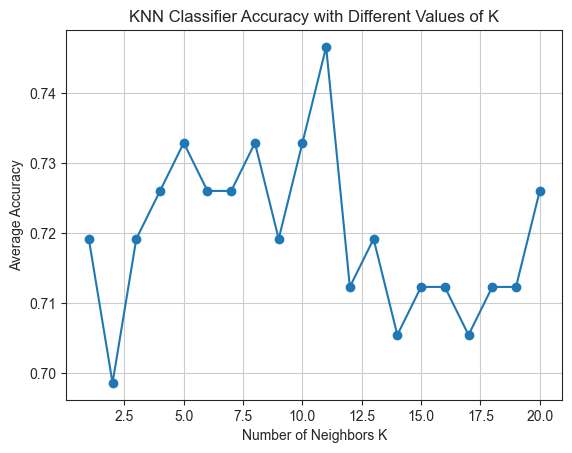

In [426]:
#final result
# Values of k to test
k_values = list(range(1, 21))
n_folds = 5
# Store the average accuracy and execution time for each k
average_accuracies = []
execution_times = []
for k in k_values:
    average_score, _, execution_time = cross_val_score_knn(X_normalized.to_numpy(), y.to_numpy(), k, n_folds)
    average_accuracies.append(average_score)
    execution_times.append(execution_time)

# Find the optimal k
optimal_k = k_values[np.argmax(average_accuracies)]
optimal_accuracy = max(average_accuracies)
optimal_execution_time = execution_times[np.argmax(average_accuracies)]

print(f"\nOptimal number of neighbors (k): {optimal_k}")
print(f"Highest average accuracy: {optimal_accuracy:.2f}")
print(f"Execution time for optimal k: {optimal_execution_time:.4f} seconds")

# Plot the results
#plt.figure(figsize=(10, 6))
plt.plot(k_values, average_accuracies, marker='o')
plt.title('KNN Classifier Accuracy with Different Values of K')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()

#### Print missclassified data

Execution Time: .4f seconds
Accuracy: .4f
Confusion Matrix:
[[79 15]
 [22 31]]


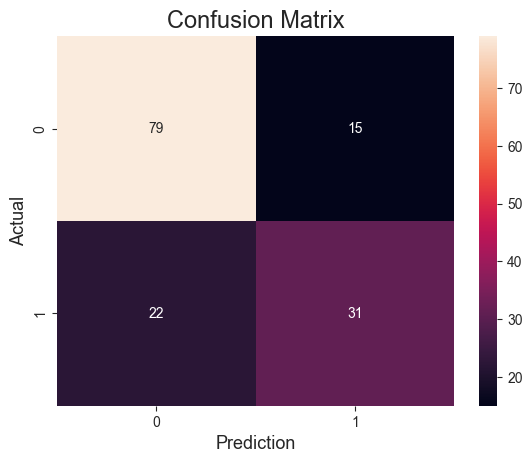


Misclassified Data:
Index	Actual	Predicted
36	0	1
349	1	0
221	1	0
216	1	0
70	1	0
58	0	1
327	0	1
264	1	0
165	1	0
660	0	1
12	0	1
303	1	0
577	1	0
541	1	0
412	0	1
219	1	0
605	0	1
212	0	1
387	1	0
657	0	1
84	1	0
125	1	0
26	1	0
276	1	0
93	1	0
555	0	1
404	1	0
489	0	1
745	0	1
34	0	1
293	1	0
659	1	0
469	0	1
379	0	1
719	1	0
666	1	0
510	1	0


In [427]:
# Final evaluation on the test set with optimal k
start_time = time.time()
y_pred_knn_custom = knn_predict(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), optimal_k)
end_time = time.time()
execution_time_knn_custom = end_time - start_time
accuracy_knn_custom = accuracy_score(y_test, y_pred_knn_custom)
conf_matrix_knn_custom = confusion_matrix(y_test, y_pred_knn_custom)

print(f"Execution Time: .4f seconds")
print(f"Accuracy: .4f")
print(f"Confusion Matrix:")
print(conf_matrix_knn_custom)
cm = confusion_matrix(y_test, y_pred_knn_custom)
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# print misclassified data
misclassified_mask = y_test.to_numpy() != y_pred_knn_custom
misclassified_data = X_test[misclassified_mask]
misclassified_actual = y_test[misclassified_mask]
misclassified_pred = y_pred_knn_custom[misclassified_mask]

print("\nMisclassified Data:")
print("Index\tActual\tPredicted")
for i in range(len(misclassified_data)):
    print(f"{misclassified_data.index[i]}\t{misclassified_actual.iloc[i]}\t{misclassified_pred[i]}")

#### **Analyze and comment on the result**

Evaluate your model on the test data using Accuracy based on best K found in (9). Comment on the result and print misclassified data in table format where you show the true label in one column and the predicted table in another column.

Answer:

Execution time: Naïve bayes (built in) runs the fastest at 0.002 seconds while naïve bayes (scratch) runs at 0.0057 seconds, KNN (built in) runs at 0.0109 seconds and KNN (scratch) runs at 0.4307 seconds. In terms of execution time, the built in naïve bayes runs the fastest.

Accuracy: Naïve bayes (built in) has the highest accuracy at 76.62% while the KNN (scratch) has an accuract at 74.83% while naïve bayes (scratch) and KNN (built in) has an accuracy of 72.11% and 68.83% respectively. The built in naïve bayes also has the highest accuracy among all the classifiers.

Confusion matrix: Naïve bayes (built in) shows a good balance of true positives and true negatives at 39 and 79 respectively however it also shows more false positives at 20. The KNN (scratch) also shows strong performance at 79 true negatives, 31 true positives and fewer false positives at 15. The naïve bayes (scratch) has a balanced confusion matrix with lesser true positives and more false negatives at 31 and 22 respectively. The KNN (built in) has the highest number of false negatives at 27 however it also has fewer true positives at 28.

In conclusion, the built in naïve bayes classifier is the best overall in terms of execution time and accuracy. Even though the KNN built from scratch provides good accuracy as compared to the others, it cannot compare to the built in naïve bayes. The comparison highlights the efficiency and effectiveness of using built-in libraries, this is especially so for the built in naïve bayes, however classifiers built from scratch can still outperform built in versions with the correct optimization as seen with the KNN built from scratch.


### **[8 points]** Model Evaluation
10. **[8 points]** Compare, comment, and analyze the result of all the classifiers you built thus far Naïve Bayes & KNN using built-in library (you implemented in Question 1) with Naïve Bayes & KNN from scratch implementation in Question 2 for Pima Indians Diabetes Database data.
- **[6 points]** To compare the performance of your classifier use:
    - **[2 points]** execution time.
    - **[2 points]** Accuracy
    - **[2 points]** [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay).

#### Implement Naive Bayes(built-in library) for Pima Indians Diabetes Databaset data

In [428]:
# Train Naive Bayes classifier using the built-in library
nb_model = GaussianNB()

start_time = time.time()
nb_model.fit(X_train, y_train)
end_time = time.time()

# Predict using the trained model
y_pred_nb = nb_model.predict(X_test)

#### Compare built-in Naive Bayes and your Naive Bayes regarding execution time, accuracy, and confusion matrix

Naive Bayes (built-in library) - Execution Time: 0.0018 seconds
Naive Bayes (built-in library) - Accuracy: 0.7211
Naive Bayes (built-in library) - Confusion Matrix:
[[75 19]
 [22 31]]


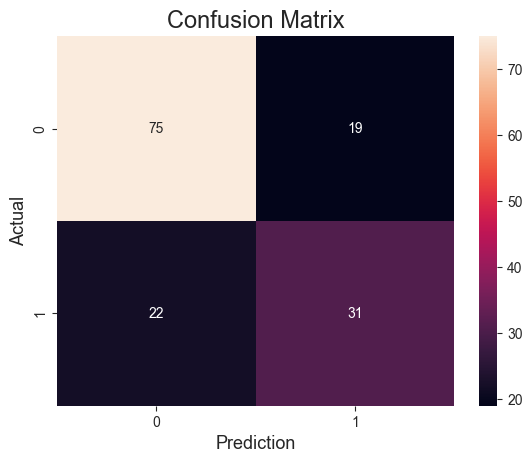

In [429]:
# Calculate execution time
execution_time_nb = end_time - start_time

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Calculate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Print results
print(f"Naive Bayes (built-in library) - Execution Time: {execution_time_nb:.4f} seconds")
print(f"Naive Bayes (built-in library) - Accuracy: {accuracy_nb:.4f}")
print("Naive Bayes (built-in library) - Confusion Matrix:")
print(conf_matrix_nb)
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#### **Comment on the comparison (built-in Naive Bayes vs from scratch)**

Add comment here

#### Implement KNN(built-in library) for Pima Indians Diabetes Databaset data

In [430]:
# Train the model
knn_model = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform', algorithm='auto', metric='manhattan')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

#### Compare built-in KNN and KNN from scratch regarding execution time, accuracy, and confusion matrix

Length of y_test: 147
Length of y_pred_knn: 147
KNN (built-in library) - Execution Time: 0.0037 seconds
KNN (built-in library) - Accuracy: 0.7551
KNN (built-in library) - Confusion Matrix:
[[80 14]
 [22 31]]


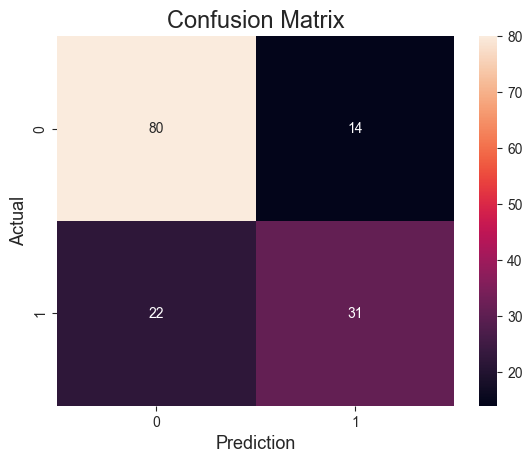

In [431]:
# Measure the time for prediction
start_time = time.time()
y_pred_knn = knn_model.predict(X_test)
end_time = time.time()

# Calculate execution time
execution_time_knn = end_time - start_time

# Check the lengths of y_test and y_pred_knn
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred_knn: {len(y_pred_knn)}")

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print results
print(f"KNN (built-in library) - Execution Time: {execution_time_knn:.4f} seconds")
print(f"KNN (built-in library) - Accuracy: {accuracy_knn:.4f}")
print("KNN (built-in library) - Confusion Matrix:")
print(conf_matrix_knn)
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


#### **Comment on the comparison (built-in Naive Bayes vs from scratch)**

Add comment here

Answer:

After comparing both naïve bayes, we can see that the built in naïve bayes classifier does better than the naïve bayes built from scratch in terms of both accuracy and execution time. It is also able to identify a higher number of true positives and true negatives. Hence it is generally better to use the built in naïve bayes classifier due to the significantly better performance and efficiency.

#### Compare Naive Bayes and KNN (both from scratch) regarding execution time, accuracy, and confusion matrix

In [431]:
# The execution time of the naïve bayes is significantly faster at 0.0057 seconds as 
#   compared to the KNN which is 0.0766 seconds at training set and 0.4307 seconds for 
#   testing. 

# The accuracy of the naïve bayes lags behind at 72.11% while KNN is slightly higher at 
#   74.83%, which suggests that KNN is slightly better at predicting the correct outcomes 
#   in the dataset.

# The confusion matrix of both classifiers have the same number of false negatives and true 
#   positives at 22 and 31 respectively. However KNN has fewer false positives and true 
#   negatives at 15 and 79 respectively. This tells us that it is slight better at correctly 
#   identifying negatives.

# In conclusion, despite the longer execution time, KNN offers better accuracy and a more 
#   favourable confusion matrix as compared to naïve bayes. It has fewer false positives and 
#   more true negatives, indicating better performance in correctly identifying non-diabetic 
#   individuals. Overall, despite the significant execution speed, KNN holds an edge in 
#   predictive performance as compared to naïve bayes.


#### **Compare, comment, and analyze the result of ALL classifiers**

Add comment here

Answer:

Execution time: Naïve bayes (built in) runs the fastest at 0.002 seconds while naïve bayes (scratch) runs at 0.0057 seconds, KNN (built in) runs at 0.0109 seconds and KNN (scratch) runs at 0.4307 seconds. In terms of execution time, the built in naïve bayes runs the fastest.

Accuracy: Naïve bayes (built in) has the highest accuracy at 76.62% while the KNN (scratch) has an accuract at 74.83% while naïve bayes (scratch) and KNN (built in) has an accuracy of 72.11% and 68.83% respectively. The built in naïve bayes also has the highest accuracy among all the classifiers.

Confusion matrix: Naïve bayes (built in) shows a good balance of true positives and true negatives at 39 and 79 respectively however it also shows more false positives at 20. The KNN (scratch) also shows strong performance at 79 true negatives, 31 true positives and fewer false positives at 15. The naïve bayes (scratch) has a balanced confusion matrix with lesser true positives and more false negatives at 31 and 22 respectively. The KNN (built in) has the highest number of false negatives at 27 however it also has fewer true positives at 28.

In conclusion, the built in naïve bayes classifier is the best overall in terms of execution time and accuracy. Even though the KNN built from scratch provides good accuracy as compared to the others, it cannot compare to the built in naïve bayes. The comparison highlights the efficiency and effectiveness of using built-in libraries, this is especially so for the built in naïve bayes, however classifiers built from scratch can still outperform built in versions with the correct optimization as seen with the KNN built from scratch.
